In [19]:
using Pkg; Pkg.activate(".")
using TSO
using PyPlot
using DelimitedFiles

  Activating environment at `/cobra/u/peitner/Turbospectrum/opacity_tables/tests/Project.toml`


# Tables

In [20]:
# Load the final, binned opacity table + EoS
eos = reload(SqEoS, joinpath("DIS_MARCS_v0.4.2", "eos.hdf5"))
opa = reload(SqOpacity, joinpath("DIS_MARCS_v0.4.2", "binned_opacities.hdf5"));

In [21]:
# Load the final, binned opacity table + EoS
eos2 = reload(SqEoS, joinpath("DIS_MARCS_v0.5.1", "eos.hdf5"))
opa2 = reload(SqOpacity, joinpath("DIS_MARCS_v0.5.1", "binned_opacities.hdf5"));

In [22]:
# Load the unbinned opacity table + EoS
eos_raw = reload(SqEoS, joinpath("tables/TSO_MARCS_v0.5", "combined_eos.hdf5"))
opa_raw = reload(SqOpacity, joinpath("tables/TSO_MARCS_v0.5", "combined_opacities.hdf5"), mmap=true);

In [23]:
label1 = "12 bins (Beeck et al. 2012)"
label2 = "4 bins (Muram)"

"4 bins (Muram)"

# Solver

In [24]:
weights = ω_midpoint(opa_raw);

In [25]:
opacities     = @binned opa
opacities2    = @binned opa2
opacities_raw = @binned opa_raw eos;

In [26]:
# Look at the result for a typical model
solar_model = @optical Average3D(eos, "stagger_av.dat") eos opa;

In [27]:
solver     = Solver(solar_model, @axed(eos), opacities=opacities)
solver2    = Solver(solar_model, @axed(eos2), opacities=opacities2)
solver_raw = Solver(solar_model, @axed(eos_raw), opacities=opacities_raw);

In [28]:
z, lnT, τ = solver.model[:, 1], solver.model[:, 2], reverse(solar_model.τ);

# Solving

In [29]:
rawJ  = Jν(solver_raw, weights)
J     = Jν(solver)
J2    = Jν(solver2);

In [30]:
rawq  = Qr(solver_raw, weights)
q     = Qr(solver)
q2    = Qr(solver2);

In [31]:
k  = lookup(eos,  opa,  :κ, solar_model.lnρ, solar_model.lnT)
k2 = lookup(eos2, opa2, :κ, solar_model.lnρ, solar_model.lnT);

# Plotting

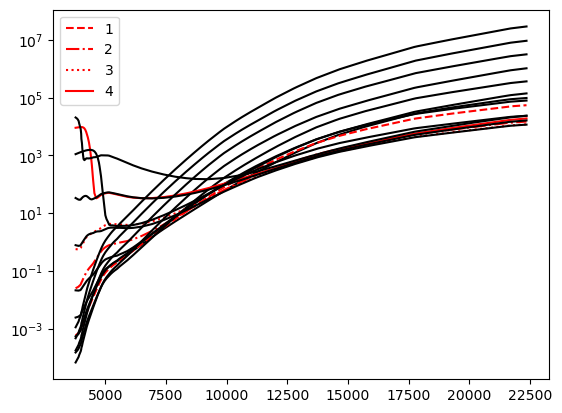

In [32]:
close()
ls = ["--", "-.", ":", "-"]
for i in axes(k, 2)
    if i <= size(k, 2) 
        plt.plot(exp.(solar_model.lnT), k[:, i]./ exp.(solar_model.lnρ), color="k")
    end

    if i <= size(k2, 2) 
        plt.plot(exp.(solar_model.lnT), k2[:, i]./ exp.(solar_model.lnρ), color="r", label="$i", ls=ls[i])
    end
end

plt.yscale("log")
plt.legend()

gcf()

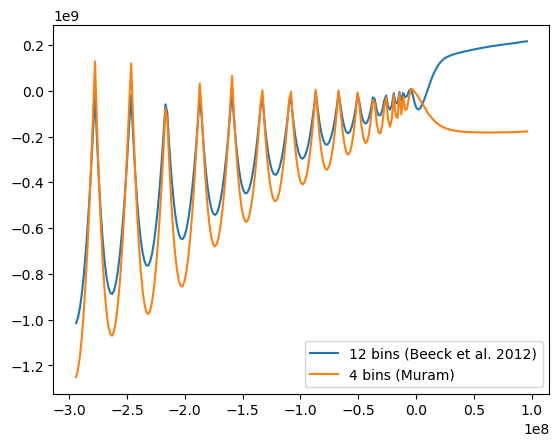

In [33]:
close()

plt.plot(z, rawJ .- J,  label=label1)
plt.plot(z, rawJ .- J2, label=label2)


plt.legend()
#plt.xlim(-0.5e8, 1e8)
#plt.ylim(1e10, 1e11)


gcf()

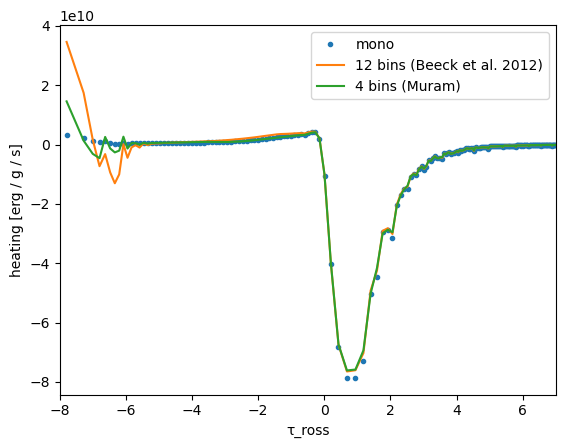

In [34]:
close()

plt.plot(log10.(τ), rawq, label="mono", marker=".", ls="")
plt.plot(log10.(τ), q, label=label1, marker="")
plt.plot(log10.(τ), q2, label=label2, marker="")

plt.legend()
#plt.yscale("log")
plt.xlim(-8., 7)
#plt.ylim(-2.0e4, 0.4e4)
plt.ylabel("heating [erg / g / s]")
plt.xlabel("τ_ross")

gcf()

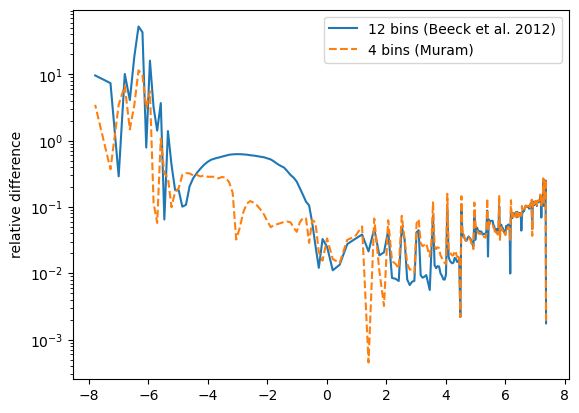

In [35]:
close()

plt.plot(log10.(τ), abs.((rawq .- q ) ./rawq) , label=label1)
plt.plot(log10.(τ), abs.((rawq .- q2) ./rawq) , label=label2, ls="--")


plt.legend()
plt.yscale("log")
#plt.xlim(-2.5, 1)

plt.ylabel("relative difference")


gcf()